In [87]:
# libraries for data reading, manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

## Data load

After a brief exploration of the data, I realized that the columns "Vlo-I" and "Vlo-O", which are associated to the numbers of programmed and operated flights respectively, both have numerical and text values. 

**In some cases**, the value of "Vlo-I" is the quite the same as the value of "Vlo-O", but just with one extra letter at the end of the number of the flight (examples: 989 and 989P // 846A and 846). It could be due a mistake when registering the flight or could be another way to label the flight. **In other cases**, the value of "Vlo-O" is actually different as the value of "Vlo-I". 

For "Vlo-I", all but one text values meet the case where the number of the flight is quite the same as the value of "Vlo-O" but just removing the letter at the end of the number. For "Vlo-O", all the text values meet the case described above.

Taking in main all these notes, the **total amount of entries with text values for "Vlo-I" is 5 (five)**, while the **total amount of entries with text values for "Vlo-O" is 16**. 

I took the decision to remove from the dataset all these entries with text values because **they represent aproximately the 0.03% of the total amount of data**, so removing them **should not affect the data, its composition or its distribution**. The **benefits** of removing them are **better handling of the data types, and facilitate the dimensionality reduction**. 

In [2]:
data = pd.read_csv("/Users/brandon.hernandez/Documents/Data-scientist-LATAM-challenge/prepared_dataset_SCL.csv")

In [3]:
print(f'The number of entries in the dataset is: {len(data)}')

The number of entries in the dataset is: 68186


## Cleaning the dataframe

In [256]:
# displaying the columns to check whether they were well loaded.
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [5]:
# displaying data type of each column.
data.dtypes

Fecha-I       object
Vlo-I          int64
Ori-I         object
Des-I         object
Emp-I         object
Fecha-O       object
Vlo-O        float64
Ori-O         object
Des-O         object
Emp-O         object
DIA            int64
MES            int64
AÑO            int64
DIANOM        object
TIPOVUELO     object
OPERA         object
SIGLAORI      object
SIGLADES      object
dtype: object

In [6]:
# let's delete all rows with NA values in one or more variables.
data = data.dropna()
data = data.reset_index(drop=True)
print(f'After dropping all entries with NA values, the number of total entries is: {len(data)}')

After dropping all entries with NA values, the number of total entries is: 68185


In [7]:
# parsing int64 and float64 values to int32 type.
data["Vlo-I"] = data["Vlo-I"].astype('int32')
data["Vlo-O"] = data["Vlo-O"].astype('int32')
data["DIA"] = data["DIA"].astype('int32')
data["MES"] = data["MES"].astype('int32')
data["AÑO"] = data["AÑO"].astype('int32')


In [8]:
# displaying data type of each column.
data.dtypes

Fecha-I      object
Vlo-I         int32
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O         int32
Ori-O        object
Des-O        object
Emp-O        object
DIA           int32
MES           int32
AÑO           int32
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [9]:
# displaying the data.
data

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68180,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68181,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68182,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68183,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


We have 18 columns with different data type values. As each variable could have different string and numerical values, we need to assess that all the columns provide good information.

In [10]:
clean_df = data.copy()

Getting all the unique values for specific columns, as well as the number of entries for some values

In [11]:
print(f'The unique values for Ori-I variable are: {clean_df["Ori-I"].unique()}')

The unique values for Ori-I variable are: ['SCEL']


In [12]:
print(f'The unique values for Ori-O variable are: {clean_df["Ori-O"].unique()}')

The unique values for Ori-O variable are: ['SCEL']


In [13]:
print(f'The unique values for AÑO variable are: {clean_df["AÑO"].unique()}')
rows_2017 = len(clean_df.query('AÑO==2017'))
rows_2018 = len(clean_df.query('AÑO==2018'))
print(f'The number of entries for 2017 is: {rows_2017}')
print(f'The number of entries for 2018 is: {rows_2018}')


The unique values for AÑO variable are: [2017 2018]
The number of entries for 2017 is: 68183
The number of entries for 2018 is: 2


In [14]:
print(f'The unique values for OPERA variable are: \n{clean_df["OPERA"].unique()}')

The unique values for OPERA variable are: 
['American Airlines' 'Air Canada' 'Air France' 'Aeromexico'
 'Aerolineas Argentinas' 'Austral' 'Avianca' 'Alitalia' 'British Airways'
 'Copa Air' 'Delta Air' 'Gol Trans' 'Iberia' 'K.L.M.' 'Qantas Airways'
 'United Airlines' 'Grupo LATAM' 'Sky Airline' 'Latin American Wings'
 'Plus Ultra Lineas Aereas' 'JetSmart SPA' 'Oceanair Linhas Aereas'
 'Lacsa']


In [15]:
print(f'The unique values for TIPOVUELO variable are: {clean_df["TIPOVUELO"].unique()}')
national_fligh = (sum(clean_df['TIPOVUELO']=='N'))
international_flights = sum(clean_df['TIPOVUELO']=='I')
print(f'The number of entries for national flights is: {national_fligh}')
print(f'The number of entries for international flights is: {international_flights}')


The unique values for TIPOVUELO variable are: ['I' 'N']
The number of entries for national flights is: 36957
The number of entries for international flights is: 31228


In [16]:
print(f'The unique values for SIGLAORI variable are: {clean_df["SIGLAORI"].unique()}')

The unique values for SIGLAORI variable are: ['Santiago']


In [17]:
print(f'The total number of unique values for SIGLADES variable is: {len(clean_df["SIGLADES"].unique())}')

The total number of unique values for SIGLADES variable is: 62


In [18]:
# The columns Ori-I and Ori-O have just one value (actually the same value in all their entries)
# The columns will be droped because they do not provide extra information to predict the delay of the flights
columns_to_drop = ['Ori-I', 'Ori-O']
clean_df = clean_df.drop(columns_to_drop, axis=1)

In [19]:
clean_df

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68180,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,400,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68181,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,400,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68182,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,400,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68183,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,400,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [20]:
# The AÑO variable has just two different values: 2017 and 2018.
# For 2018 we only have 2 entries, so the entries for 2018 will be dropped.
clean_df = clean_df[clean_df.AÑO != 2018] 
# As we have just one value for the AÑO variable after removing the entries with value of 2018, 
# the variable AÑO will be dropped because it does not provide more information to predict delay of the flights.
clean_df = clean_df.drop("AÑO", axis=1)

In [21]:
clean_df = clean_df.reset_index(drop=True)

In [22]:
# The column "SIGLAORI" is the only one column that still has the same value for each row (Santiago)
# So the column will be dropped because it does not provide more information to predict dalay of the flights
clean_df = clean_df.drop("SIGLAORI", axis=1)

In [23]:
clean_df

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,Domingo,I,American Airlines,Miami
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,Lunes,I,American Airlines,Miami
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,Martes,I,American Airlines,Miami
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,Miercoles,I,American Airlines,Miami
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,Jueves,I,American Airlines,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68178,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,400,SPJC,JAT,22,12,Viernes,I,JetSmart SPA,Lima
68179,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,400,SPJC,JAT,25,12,Lunes,I,JetSmart SPA,Lima
68180,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,400,SPJC,JAT,27,12,Miercoles,I,JetSmart SPA,Lima
68181,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,400,SPJC,JAT,29,12,Viernes,I,JetSmart SPA,Lima


In [24]:
comparissons = np.where(clean_df['Vlo-I']!=clean_df['Vlo-O'], True, False)
print(f'The number of flight codes changed is: {sum(comparissons)}')

The number of flight codes changed is: 100


## Mapping variables

In [25]:
map_month = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre',
}
clean_df['MES'] = clean_df['MES'].map(map_month)

In [26]:
clean_df

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,Enero,Domingo,I,American Airlines,Miami
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,Enero,Lunes,I,American Airlines,Miami
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,Enero,Martes,I,American Airlines,Miami
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,Enero,Miercoles,I,American Airlines,Miami
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,Enero,Jueves,I,American Airlines,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68178,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,400,SPJC,JAT,22,Diciembre,Viernes,I,JetSmart SPA,Lima
68179,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,400,SPJC,JAT,25,Diciembre,Lunes,I,JetSmart SPA,Lima
68180,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,400,SPJC,JAT,27,Diciembre,Miercoles,I,JetSmart SPA,Lima
68181,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,400,SPJC,JAT,29,Diciembre,Viernes,I,JetSmart SPA,Lima


## Data visualization and analysis

#### Distribution of flights by day

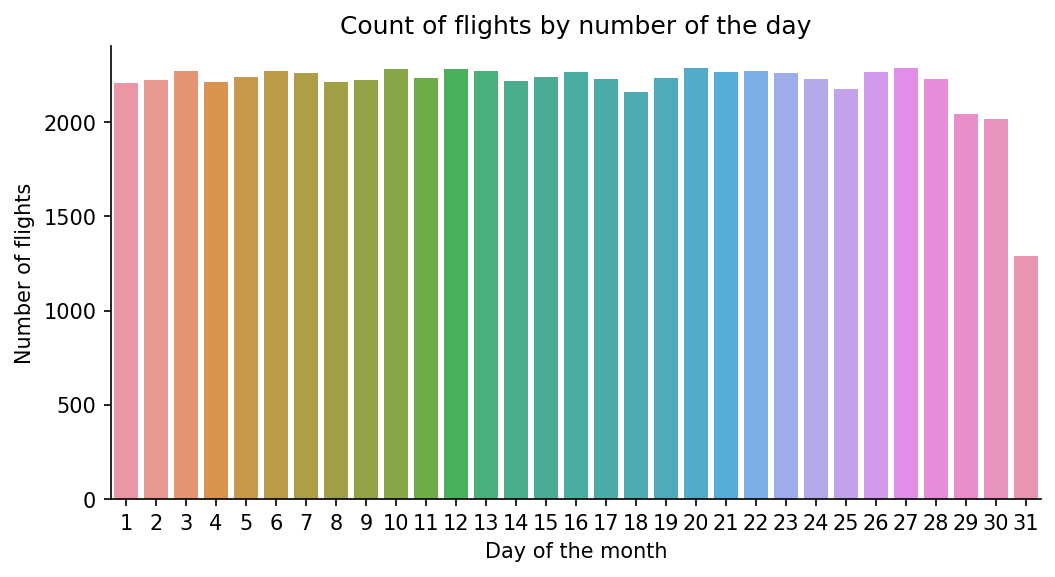

In [166]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.countplot(ax=ax, x='DIA', data=clean_df).set_title("Count of flights by number of the day")
ax.set_ylabel('Number of flights')
ax.set_xlabel('Day of the month')
sns.despine()
plt.savefig("charts/Flights_by_number_day.png")

#### Distribution of flights by month

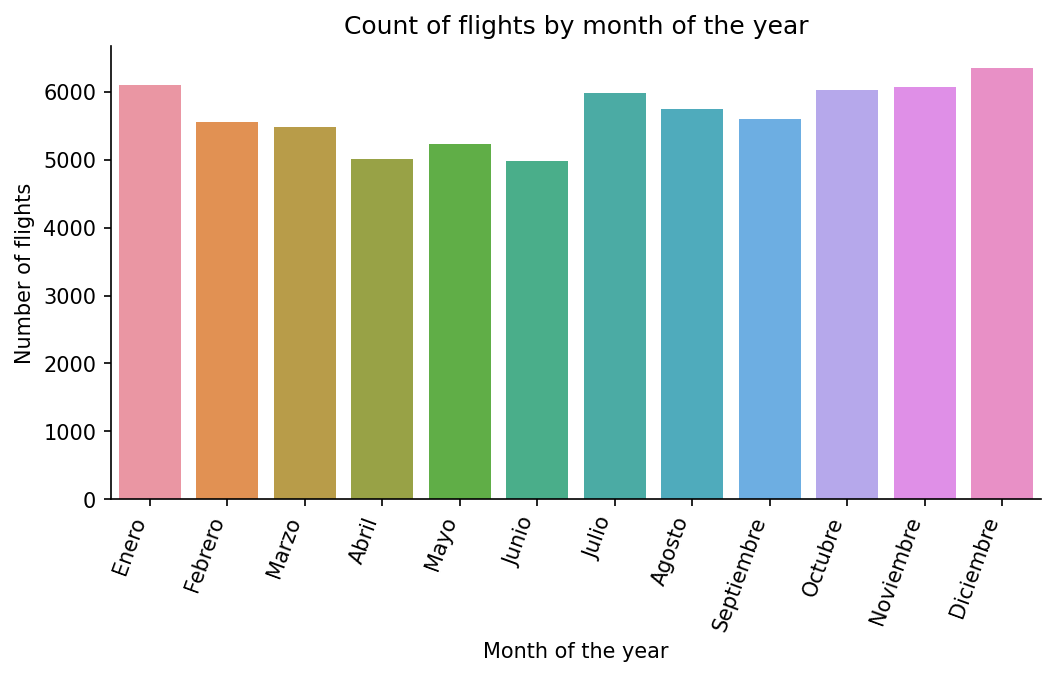

In [167]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.countplot(ax=ax, x='MES', data=clean_df).set_title("Count of flights by month of the year")
ax.set_ylabel('Number of flights')
ax.set_xlabel('Month of the year')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, horizontalalignment='right')
sns.despine()
plt.savefig("charts/Flights_by_month.png")

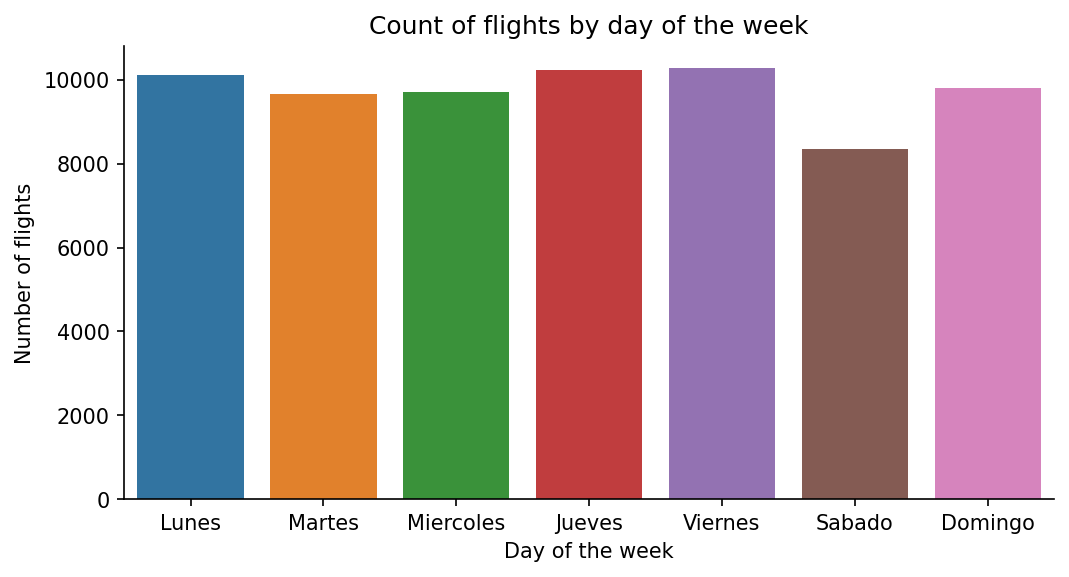

In [168]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.countplot(
        ax=ax,
        x='DIANOM',
        data=clean_df, order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
    ).set_title("Count of flights by day of the week")
ax.set_ylabel('Number of flights')
ax.set_xlabel('Day of the week')
sns.despine()
plt.savefig("charts/Flights_by_week_day.png")

In [30]:
type_of_flight = clean_df["TIPOVUELO"].value_counts()
type_of_flight = type_of_flight.to_frame()
type_of_flight

,TIPOVUELO
N,36957
I,31226


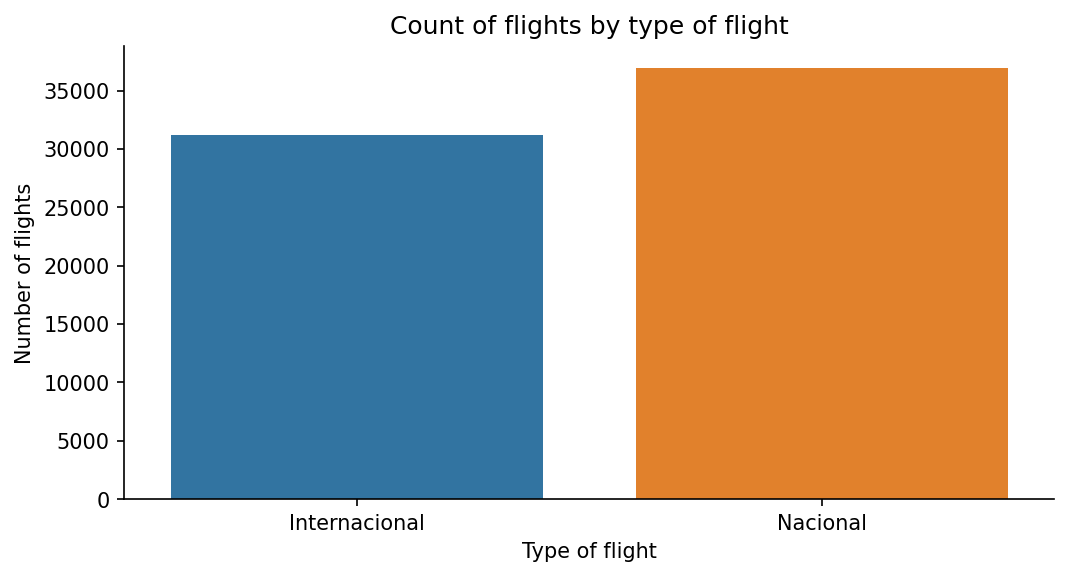

In [169]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.countplot(ax=ax, x='TIPOVUELO', data=clean_df).set_title("Count of flights by type of flight")
ax.set_ylabel('Number of flights')
ax.set_xlabel('Type of flight')
ax.set_xticklabels(['Internacional', 'Nacional'])
sns.despine()
plt.savefig("charts/Flights_by_type.png")

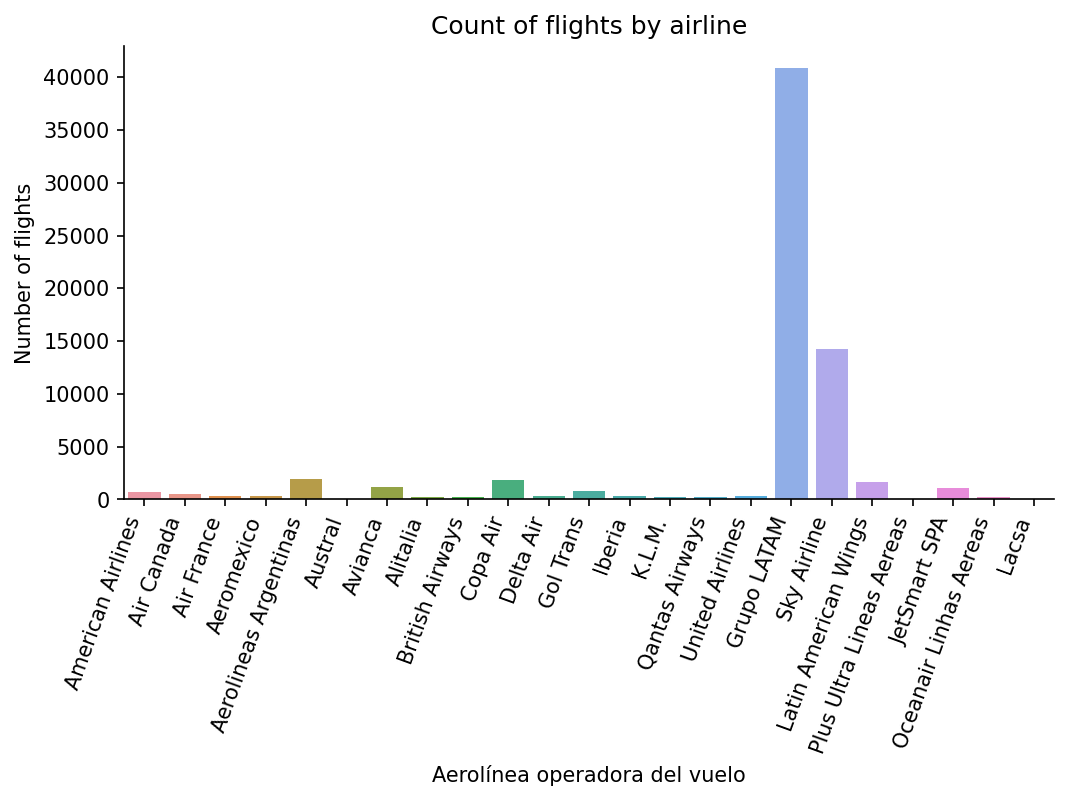

In [170]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.countplot(ax=ax, x='OPERA', data=clean_df).set_title("Count of flights by airline")
ax.set_ylabel('Number of flights')
ax.set_xlabel('Aerolínea operadora del vuelo')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, horizontalalignment='right')
sns.despine()
plt.savefig("charts/Flights_by_airline.png")

In [33]:
count_of_flights_by_city = clean_df["SIGLADES"].value_counts()
count_of_flights_by_city = count_of_flights_by_city.to_frame()
count_of_flights_by_city.describe()

,SIGLADES
count,62.000000
mean,1099.725806
std,1612.979812
min,1.000000
25%,56.250000
50%,344.000000
75%,1561.750000
max,6335.000000


In [34]:
count_of_flights_by_city[count_of_flights_by_city["SIGLADES"] >= 1000]

,SIGLADES
Buenos Aires,6335
Antofagasta,5785
Lima,5268
Calama,5146
Puerto Montt,4357
Concepcion,3987
Iquique,3747
Sao Paulo,3569
Temuco,2589
Arica,2436


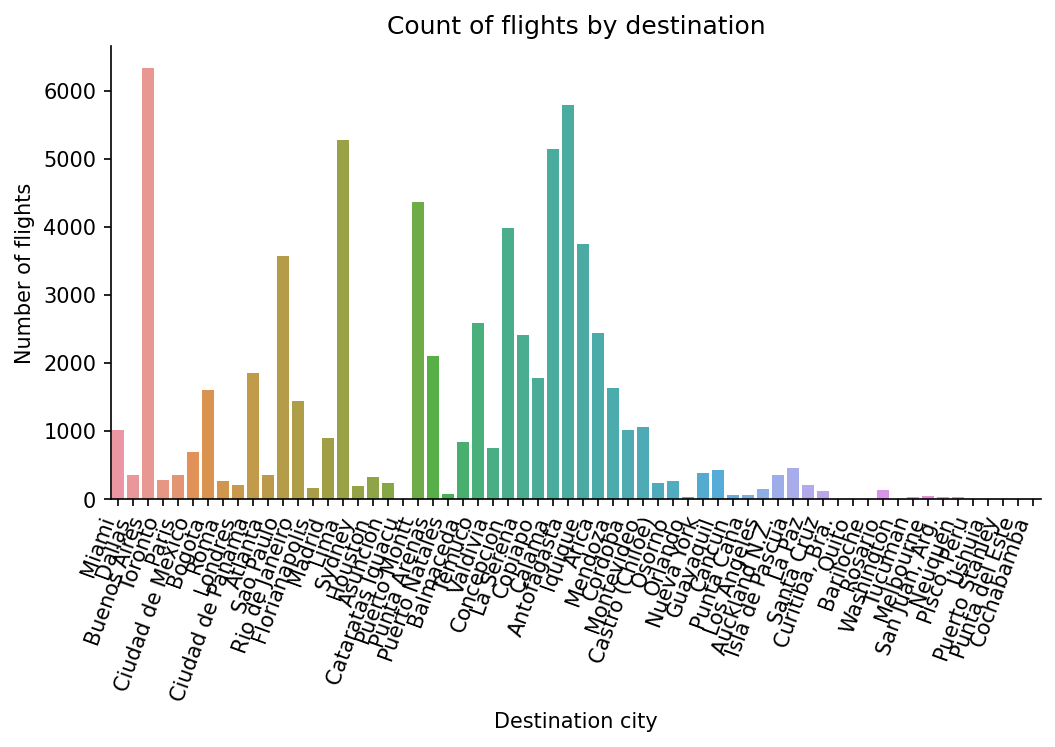

In [171]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.countplot(ax=ax, x='SIGLADES', data=clean_df).set_title("Count of flights by destination")
ax.set_ylabel('Number of flights')
ax.set_xlabel('Destination city')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, horizontalalignment='right')
sns.despine()
plt.savefig("charts/Flights_by_destination.png")

### Analysis of data distributions

From the past charts we can ensure that the data is quite balance considering the distribution for "DIA", "MES", "DIANOM" and "TIPOVUELO" variables. On the other hand, taking the "OPERA" and "SIGLADES" variables, the data is too unbalanced with most of the values in a couple of airlines and destinations. 
If we try to predict or generate a model with unbalanced data, it is possible to have a biased model. But, if we try to generate a model considering just the variables in which data is balanced it is possible that we are making assumptions that drive the solution to be also biased. 

We can observe that the distribution of flights by month represents the real-life distribution of them, where the high season is present at the beginning, at the middle, and at the end of the year, corresponding to January, July, and December months, which are months with holidays and vacation seasons.

From the data available, all the flights have "SCEL" as the origin airport, which is an airport in Santiago, Chile. As we could expect, Grupo LATAM operated most of the flights due to being a Chilean-based airline, followed by Sky Airline which is another Chilean-based airline. We can see another airlines operating flights with from the "SCEL" airport, but their amount of flights is smaller than the flights of the first two airlines mentioned.  

### Unexpected behaviors

From the plot of count of flights by number of the day, I didn't expect that the number of total flights could be similarly distributed for most of the days, and at the end of the month the number of flights decreases a lot. Possibly this event happens because at the end of the month most of the people does not have enough money to pay for a flight, or maybe the event is related to companies' behaviors to have their accounts well controlled. 

From the count of flights by day of the week, I didn't expect that the number of total flights could be smaller on Saturdays, while Mondays could have a greater amount of flights, as well as Wednesdays and Thursdays. Maybe this event happens because on Mondays companies require to flight at the beginning of the week to perform their businesses, while on Wednesdays and Thursdays people take flights to take vacations until the end of the weekend. About the small number of flights on Saturdays, it is possible that companies do not need to take flights to perform their businesses or maybe people interested in vacationing took their flights before to enjoy the entire weekend.

The last unexpected distribution is for type of flight. I didn't expect that both national and international amount of flights could be quite similar. I expected that national flights were the majority of flights, but having quite similar distribution for that variable help us to generate a better solution. 

### Possible actions

As we have unbalanced data for some variables, it is possible that we need to develop different models for airlines: one for LATAM (and maybe Sky Airlines), and another one for the airlines with less presence of flights. 
If we consider the destination city, we don't have a good distribution of the data, so it is possible that we need to generate synthetic data or perform data sampling to try to balance them.

## Synthetic features

It is requested to generate the following synthetic features:
- temporada_alta
- dif_min
- atraso_15
- periodo_dia


In [201]:
synthetic_df = clean_df.copy()

In [202]:
# splitting Fecha-I and Fecha-O columns into two columns each: Fecha-I, Hora-I, Fecha-O, Hora-O
synthetic_df[['Fecha-I', 'Hora-I']] = synthetic_df['Fecha-I'].str.split(' ', expand=True)
synthetic_df[['Fecha-O', 'Hora-O']] = synthetic_df['Fecha-O'].str.split(' ', expand=True)
synthetic_df

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,Hora-I,Hora-O
0,2017-01-01,226,KMIA,AAL,2017-01-01,226,KMIA,AAL,1,Enero,Domingo,I,American Airlines,Miami,23:30:00,23:33:00
1,2017-01-02,226,KMIA,AAL,2017-01-02,226,KMIA,AAL,2,Enero,Lunes,I,American Airlines,Miami,23:30:00,23:39:00
2,2017-01-03,226,KMIA,AAL,2017-01-03,226,KMIA,AAL,3,Enero,Martes,I,American Airlines,Miami,23:30:00,23:39:00
3,2017-01-04,226,KMIA,AAL,2017-01-04,226,KMIA,AAL,4,Enero,Miercoles,I,American Airlines,Miami,23:30:00,23:33:00
4,2017-01-05,226,KMIA,AAL,2017-01-05,226,KMIA,AAL,5,Enero,Jueves,I,American Airlines,Miami,23:30:00,23:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68178,2017-12-22,400,SPJC,JAT,2017-12-22,400,SPJC,JAT,22,Diciembre,Viernes,I,JetSmart SPA,Lima,14:55:00,15:41:00
68179,2017-12-25,400,SPJC,JAT,2017-12-25,400,SPJC,JAT,25,Diciembre,Lunes,I,JetSmart SPA,Lima,14:55:00,15:11:00
68180,2017-12-27,400,SPJC,JAT,2017-12-27,400,SPJC,JAT,27,Diciembre,Miercoles,I,JetSmart SPA,Lima,14:55:00,15:35:00
68181,2017-12-29,400,SPJC,JAT,2017-12-29,400,SPJC,JAT,29,Diciembre,Viernes,I,JetSmart SPA,Lima,14:55:00,15:08:00


In [203]:
def check_fecha(fecha, march, july_15, july_31, september_11, september_30, december):
    if fecha <= march:
        return 1
    elif july_15 <= fecha and fecha <= july_31:
        return 1
    elif september_11 <= fecha and fecha <= september_30:
        return 1
    elif fecha >= december:
        return 1
    else:
        return 0

def temporada_alta_feature(date_row):
    march = datetime.strptime('2017-03-03', '%Y-%m-%d')
    july_15 = datetime.strptime('2017-07-15', '%Y-%m-%d')
    july_31 = datetime.strptime('2017-07-31', '%Y-%m-%d')
    september_11 = datetime.strptime('2017-09-11', '%Y-%m-%d')
    september_30 = datetime.strptime('2017-09-30', '%Y-%m-%d')
    december = datetime.strptime('2017-12-15', '%Y-%m-%d')
    temporada_alta = []
    for date in date_row:
        date = datetime.strptime(date, '%Y-%m-%d')
        temporada_alta.append(check_fecha(date, march, july_15, july_31, september_11, september_30, december))
    return temporada_alta
        

In [204]:
temporada_alta = temporada_alta_feature(synthetic_df["Fecha-I"])
synthetic_df["temporada_alta"] = temporada_alta
row_number = 32562
print(f'date for row number {row_number}: {synthetic_df.loc[[row_number]]["Fecha-I"]} \tTemporada alta: {synthetic_df.loc[[row_number]]["temporada_alta"]}')
print(f'date for row number {row_number}: {synthetic_df.loc[[row_number+1]]["Fecha-I"]} \tTemporada alta: {synthetic_df.loc[[row_number+1]]["temporada_alta"]}')

date for row number 32562: 32562    2017-07-14
Name: Fecha-I, dtype: object 	Temporada alta: 32562    0
Name: temporada_alta, dtype: int64
date for row number 32562: 32563    2017-07-15
Name: Fecha-I, dtype: object 	Temporada alta: 32563    1
Name: temporada_alta, dtype: int64


In [205]:
synthetic_df

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,Hora-I,Hora-O,temporada_alta
0,2017-01-01,226,KMIA,AAL,2017-01-01,226,KMIA,AAL,1,Enero,Domingo,I,American Airlines,Miami,23:30:00,23:33:00,1
1,2017-01-02,226,KMIA,AAL,2017-01-02,226,KMIA,AAL,2,Enero,Lunes,I,American Airlines,Miami,23:30:00,23:39:00,1
2,2017-01-03,226,KMIA,AAL,2017-01-03,226,KMIA,AAL,3,Enero,Martes,I,American Airlines,Miami,23:30:00,23:39:00,1
3,2017-01-04,226,KMIA,AAL,2017-01-04,226,KMIA,AAL,4,Enero,Miercoles,I,American Airlines,Miami,23:30:00,23:33:00,1
4,2017-01-05,226,KMIA,AAL,2017-01-05,226,KMIA,AAL,5,Enero,Jueves,I,American Airlines,Miami,23:30:00,23:28:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68178,2017-12-22,400,SPJC,JAT,2017-12-22,400,SPJC,JAT,22,Diciembre,Viernes,I,JetSmart SPA,Lima,14:55:00,15:41:00,1
68179,2017-12-25,400,SPJC,JAT,2017-12-25,400,SPJC,JAT,25,Diciembre,Lunes,I,JetSmart SPA,Lima,14:55:00,15:11:00,1
68180,2017-12-27,400,SPJC,JAT,2017-12-27,400,SPJC,JAT,27,Diciembre,Miercoles,I,JetSmart SPA,Lima,14:55:00,15:35:00,1
68181,2017-12-29,400,SPJC,JAT,2017-12-29,400,SPJC,JAT,29,Diciembre,Viernes,I,JetSmart SPA,Lima,14:55:00,15:08:00,1


In [206]:
def calculate_atraso(time1, time2):
    atraso = 0
    seconds_difference = abs(time2-time1).seconds
    minutes_difference = seconds_difference / 60
    if minutes_difference > 15:
        atraso = 1
    return minutes_difference, atraso

def dif_min_and_atraso_features(time_row_1, time_row_2):
    diff_min = []
    atraso_15 = []
    for time1, time2 in zip(time_row_1, time_row_2):
        time1 = datetime.strptime(time1, "%H:%M:%S")
        time2 = datetime.strptime(time2, "%H:%M:%S")
        minutes_difference, atraso = calculate_atraso(time1, time2)
        diff_min.append(minutes_difference)
        atraso_15.append(atraso)
    data = {'dif_min': diff_min, 'atraso_15': atraso_15}
    return pd.DataFrame(data)

In [207]:
dif_min_and_atraso = dif_min_and_atraso_features(synthetic_df["Hora-I"], synthetic_df["Hora-O"])
synthetic_df = synthetic_df.join(dif_min_and_atraso)
synthetic_df

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,Hora-I,Hora-O,temporada_alta,dif_min,atraso_15
0,2017-01-01,226,KMIA,AAL,2017-01-01,226,KMIA,AAL,1,Enero,Domingo,I,American Airlines,Miami,23:30:00,23:33:00,1,3.0,0
1,2017-01-02,226,KMIA,AAL,2017-01-02,226,KMIA,AAL,2,Enero,Lunes,I,American Airlines,Miami,23:30:00,23:39:00,1,9.0,0
2,2017-01-03,226,KMIA,AAL,2017-01-03,226,KMIA,AAL,3,Enero,Martes,I,American Airlines,Miami,23:30:00,23:39:00,1,9.0,0
3,2017-01-04,226,KMIA,AAL,2017-01-04,226,KMIA,AAL,4,Enero,Miercoles,I,American Airlines,Miami,23:30:00,23:33:00,1,3.0,0
4,2017-01-05,226,KMIA,AAL,2017-01-05,226,KMIA,AAL,5,Enero,Jueves,I,American Airlines,Miami,23:30:00,23:28:00,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68178,2017-12-22,400,SPJC,JAT,2017-12-22,400,SPJC,JAT,22,Diciembre,Viernes,I,JetSmart SPA,Lima,14:55:00,15:41:00,1,46.0,1
68179,2017-12-25,400,SPJC,JAT,2017-12-25,400,SPJC,JAT,25,Diciembre,Lunes,I,JetSmart SPA,Lima,14:55:00,15:11:00,1,16.0,1
68180,2017-12-27,400,SPJC,JAT,2017-12-27,400,SPJC,JAT,27,Diciembre,Miercoles,I,JetSmart SPA,Lima,14:55:00,15:35:00,1,40.0,1
68181,2017-12-29,400,SPJC,JAT,2017-12-29,400,SPJC,JAT,29,Diciembre,Viernes,I,JetSmart SPA,Lima,14:55:00,15:08:00,1,13.0,0


In [208]:
def periodo_dia_feature(time_row):
    periodo_dia = []
    manana_lower = datetime.strptime("05:00:00", "%H:%M:%S")
    manana_upper = datetime.strptime("11:59:00", "%H:%M:%S")
    tarde_lower = datetime.strptime("12:00:00", "%H:%M:%S")
    tarde_upper = datetime.strptime("18:59:00", "%H:%M:%S")
    for time in time_row:
        time = datetime.strptime(time, "%H:%M:%S")
        if manana_lower <= time and time <= manana_upper:
            periodo_dia.append("mañana")
        elif tarde_lower <= time and time <= tarde_upper:
            periodo_dia.append("tarde")
        else:
            periodo_dia.append("noche")
    return pd.DataFrame(periodo_dia)


In [209]:
synthetic_df["periodo_dia"] = periodo_dia_feature(synthetic_df["Hora-I"])

In [210]:
synthetic_df["atraso_15"].sum()

12670

In [211]:
synthetic_df.to_csv("synthetic_features.csv")

## Delay visualization and analysis

#### Delayed flights by airline

In [415]:
def delayed_rate(total_flights_row, atraso_15_row):
    rate = [(atraso_15 / total_flights)*100 for total_flights, atraso_15 in zip(total_flights_row, atraso_15_row)]
    return pd.DataFrame(rate)

def delayed_df(dataframe, coulmn_to_group, sort):
    grouped = dataframe.groupby(coulmn_to_group).agg({"dif_min": "count", "atraso_15": "sum"}).reset_index().rename(columns={"dif_min": "total_flights"})
    if sort:
        grouped = grouped.sort_values("total_flights", ascending=False)
        grouped = grouped.reset_index(drop=True)
    grouped["delayed_rate"] = delayed_rate(grouped["total_flights"], grouped["atraso_15"])
    return grouped

In [416]:
grouped_by_airlines = synthetic_df.copy()
grouped_by_airlines = delayed_df(grouped_by_airlines, "OPERA", True)
grouped_by_airlines

,OPERA,total_flights,atraso_15,delayed_rate
0,Grupo LATAM,40883,7368,18.022161
1,Sky Airline,14293,2536,17.742951
2,Aerolineas Argentinas,1949,468,24.012314
3,Copa Air,1850,116,6.270270
4,Latin American Wings,1672,681,40.729665
5,Avianca,1152,306,26.562500
6,JetSmart SPA,1095,196,17.899543
7,Gol Trans,806,287,35.607940
8,American Airlines,755,50,6.622517
9,Air Canada,565,258,45.663717


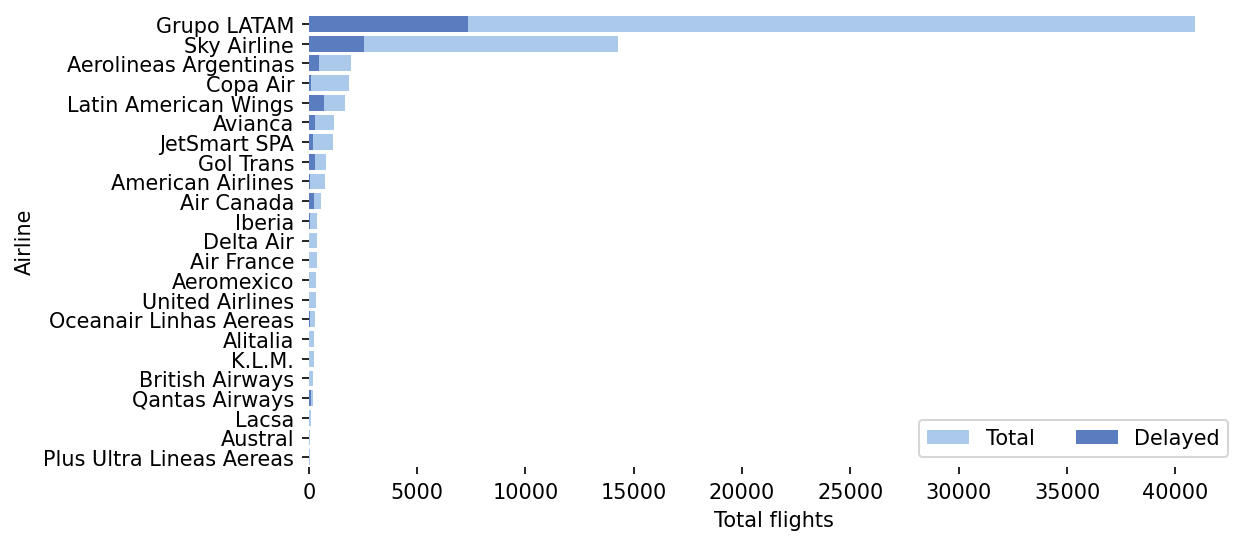

In [417]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.set_color_codes("pastel")
sns.barplot(ax=ax, x="total_flights", y="OPERA", data=grouped_by_airlines, label="Total", color='b')
sns.set_color_codes("muted")
sns.barplot(ax=ax, x='atraso_15', y="OPERA", data=grouped_by_airlines, label="Delayed", color='b')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Airline", xlabel="Total flights")
sns.despine(left=True, bottom=True)

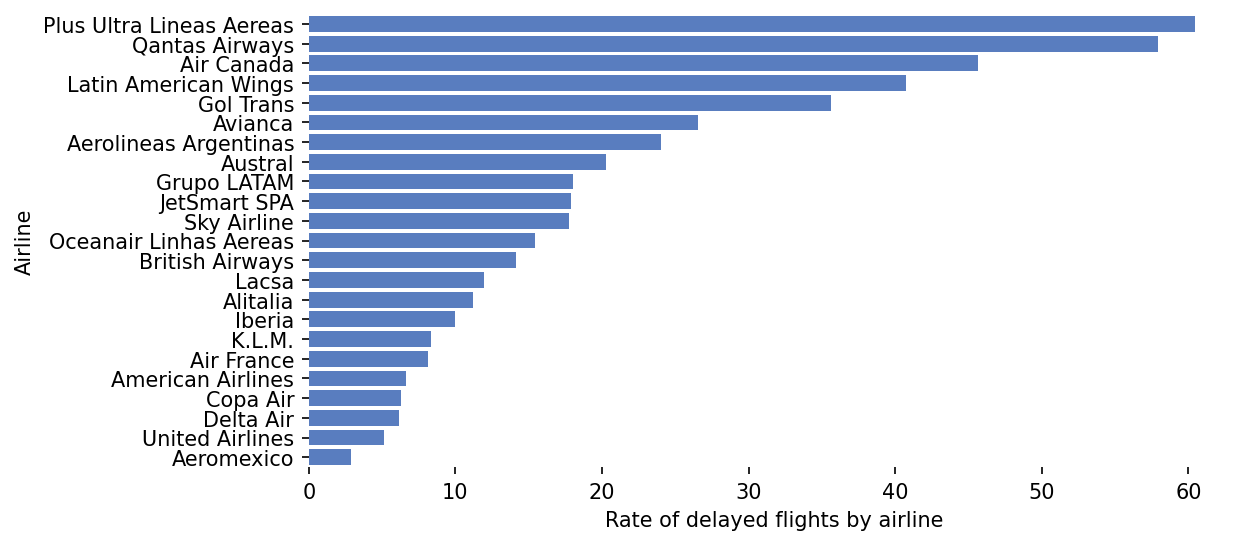

In [467]:
grouped_by_airlines = grouped_by_airlines.sort_values("delayed_rate", ascending=False)

fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.barplot(ax=ax, x="delayed_rate", y="OPERA", data=grouped_by_airlines, color='b')
ax.set(ylabel="Airline", xlabel="Rate of delayed flights by airline")
sns.despine(left=True, bottom=True)
plt.savefig('delayed_flights/rate_by_airline.png')

#### Delayed flights by month

In [420]:
grouped_by_month = synthetic_df.copy()
grouped_by_month = delayed_df(grouped_by_month, "MES", True)
grouped_by_month

,MES,total_flights,atraso_15,delayed_rate
0,Diciembre,6356,1617,25.440529
1,Enero,6105,997,16.330876
2,Noviembre,6078,1203,19.792695
3,Octubre,6031,1365,22.633063
4,Julio,5991,1759,29.360708
5,Agosto,5742,998,17.380704
6,Septiembre,5609,970,17.293635
7,Febrero,5561,856,15.392915
8,Marzo,5479,634,11.571455
9,Mayo,5234,828,15.819641


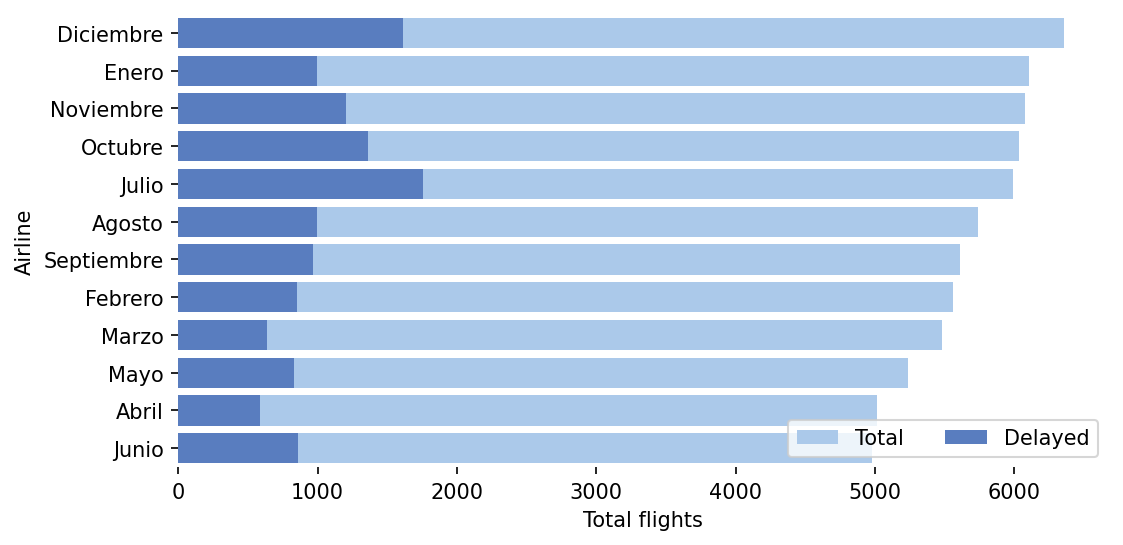

In [421]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.set_color_codes("pastel")
sns.barplot(ax=ax, x="total_flights", y="MES", data=grouped_by_month, label="Total", color='b')
sns.set_color_codes("muted")
sns.barplot(ax=ax, x='atraso_15', y="MES", data=grouped_by_month, label="Delayed", color='b')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Month", xlabel="Total flights")
sns.despine(left=True, bottom=True)

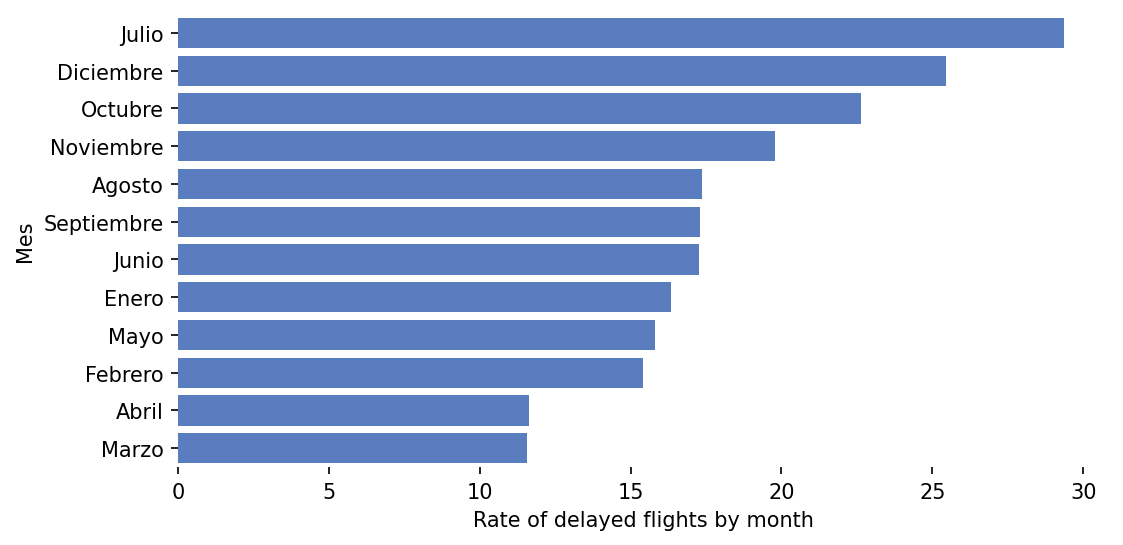

In [468]:
grouped_by_month = grouped_by_month.sort_values("delayed_rate", ascending=False)

fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.barplot(ax=ax, x="delayed_rate", y="MES", data=grouped_by_month, color='b')
ax.set(ylabel="Mes", xlabel="Rate of delayed flights by month")
sns.despine(left=True, bottom=True)
plt.savefig('delayed_flights/rate_by_month.png')

#### Delayed flights by Day of the week

In [426]:
grouped_by_day = synthetic_df.copy()
grouped_by_day = delayed_df(grouped_by_day, "DIANOM", True)
grouped_by_day.head()

,DIANOM,total_flights,atraso_15,delayed_rate
0,Viernes,10290,2284,22.196307
1,Jueves,10242,2045,19.966803
2,Lunes,10126,2068,20.422674
3,Domingo,9793,1583,16.164607
4,Miercoles,9720,1668,17.160494


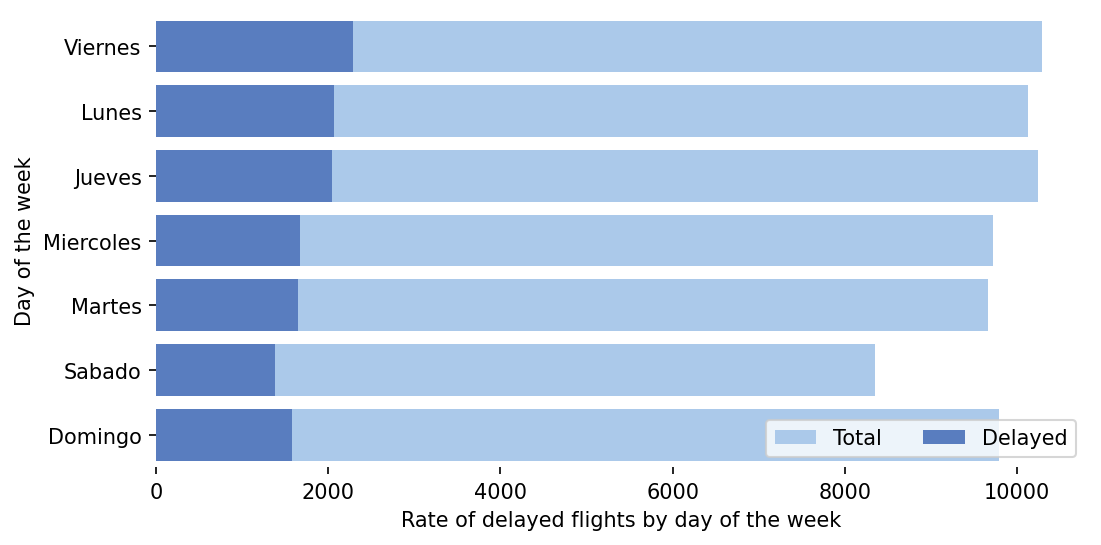

In [470]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.set_color_codes("pastel")
sns.barplot(ax=ax, x="total_flights", y="DIANOM", data=grouped_by_day, label="Total", color='b')
sns.set_color_codes("muted")
sns.barplot(ax=ax, x='atraso_15', y="DIANOM", data=grouped_by_day, label="Delayed", color='b')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Day of the week", xlabel="Rate of delayed flights by day of the week")
sns.despine(left=True, bottom=True)

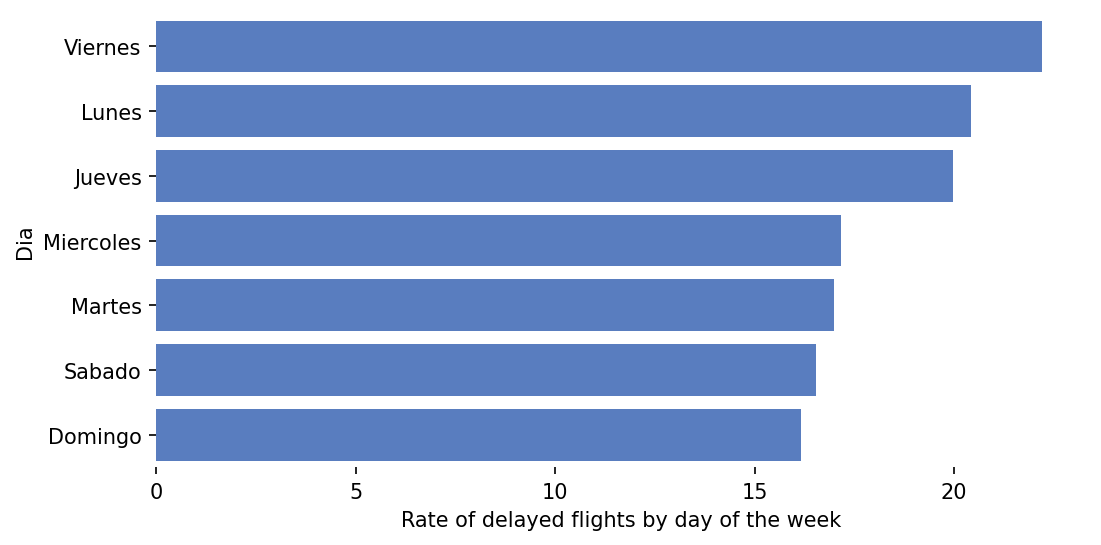

In [471]:
grouped_by_day = grouped_by_day.sort_values("delayed_rate", ascending=False)

fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.barplot(ax=ax, x="delayed_rate", y="DIANOM", data=grouped_by_day, color='b')
ax.set(ylabel="Dia", xlabel="Rate of delayed flights by day of the week")
sns.despine(left=True, bottom=True)
plt.savefig('delayed_flights/rate_by_day.png')

#### Delayed flights by season

In [438]:
grouped_by_season = synthetic_df.copy()
grouped_by_season = delayed_df(grouped_by_season, "temporada_alta", True)
grouped_by_season["temporada_alta"] = grouped_by_season["temporada_alta"].map({0: 'Alta', 1: 'Baja'})
grouped_by_season

,temporada_alta,total_flights,atraso_15,delayed_rate
0,Alta,45425,8165,17.974684
1,Baja,22758,4505,19.795237


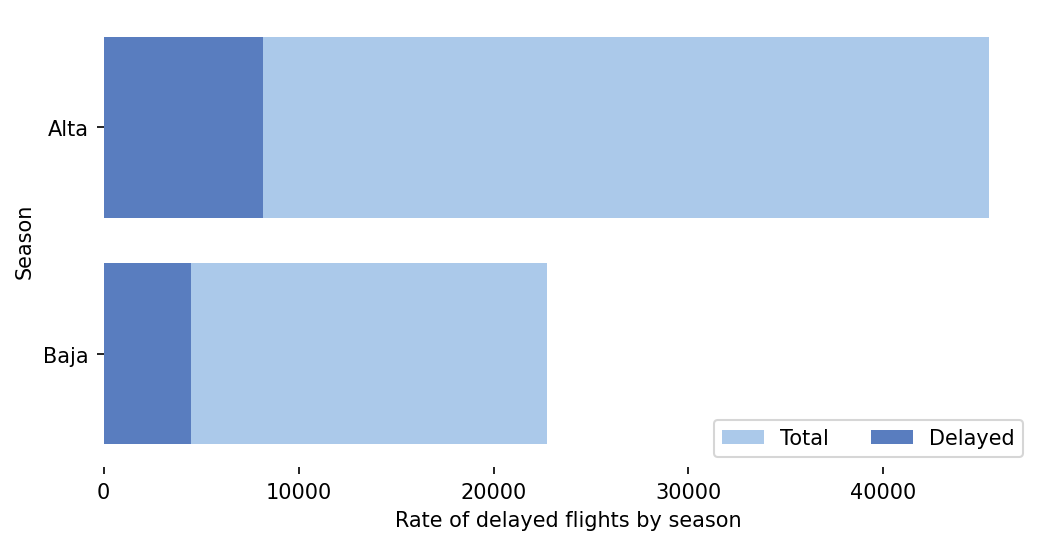

In [472]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.set_color_codes("pastel")
sns.barplot(ax=ax, x="total_flights", y="temporada_alta", data=grouped_by_season, label="Total", color='b')
sns.set_color_codes("muted")
sns.barplot(ax=ax, x='atraso_15', y="temporada_alta", data=grouped_by_season, label="Delayed", color='b')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Season", xlabel="Rate of delayed flights by season")
sns.despine(left=True, bottom=True)
plt.savefig('delayed_flights/rate_by_season.png')

#### Delayed flights by type of flight

In [442]:
grouped_by_type = synthetic_df.copy()
grouped_by_type = delayed_df(grouped_by_type, "TIPOVUELO", True)
grouped_by_type

,TIPOVUELO,total_flights,atraso_15,delayed_rate
0,N,36957,5561,15.047217
1,I,31226,7109,22.766285


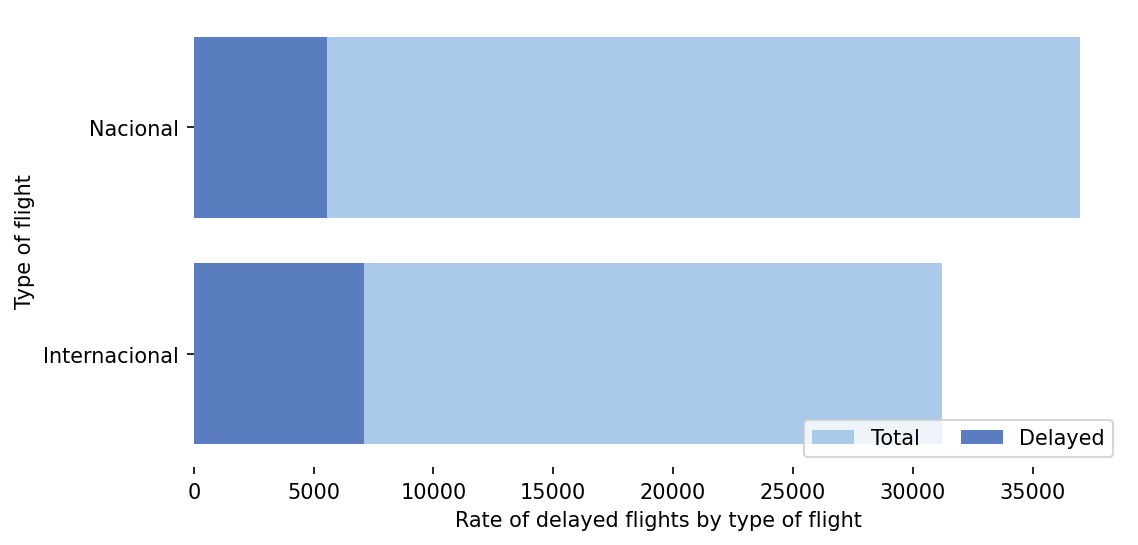

In [473]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.set_color_codes("pastel")
sns.barplot(ax=ax, x="total_flights", y="TIPOVUELO", data=grouped_by_type, label="Total", color='b')
sns.set_color_codes("muted")
sns.barplot(ax=ax, x='atraso_15', y="TIPOVUELO", data=grouped_by_type, label="Delayed", color='b')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type of flight", xlabel="Rate of delayed flights by type of flight")
ax.set_yticklabels(['Nacional', 'Internacional'])
sns.despine(left=True, bottom=True)
plt.savefig('delayed_flights/rate_by_type.png')

In [459]:
grouped_by_destination = synthetic_df.copy()
grouped_by_destination = delayed_df(grouped_by_destination, "SIGLADES", True)
grouped_by_destination.head()

,SIGLADES,total_flights,atraso_15,delayed_rate
0,Buenos Aires,6335,1658,26.172060
1,Antofagasta,5785,847,14.641314
2,Lima,5268,1213,23.025816
3,Calama,5146,629,12.223086
4,Puerto Montt,4357,734,16.846454


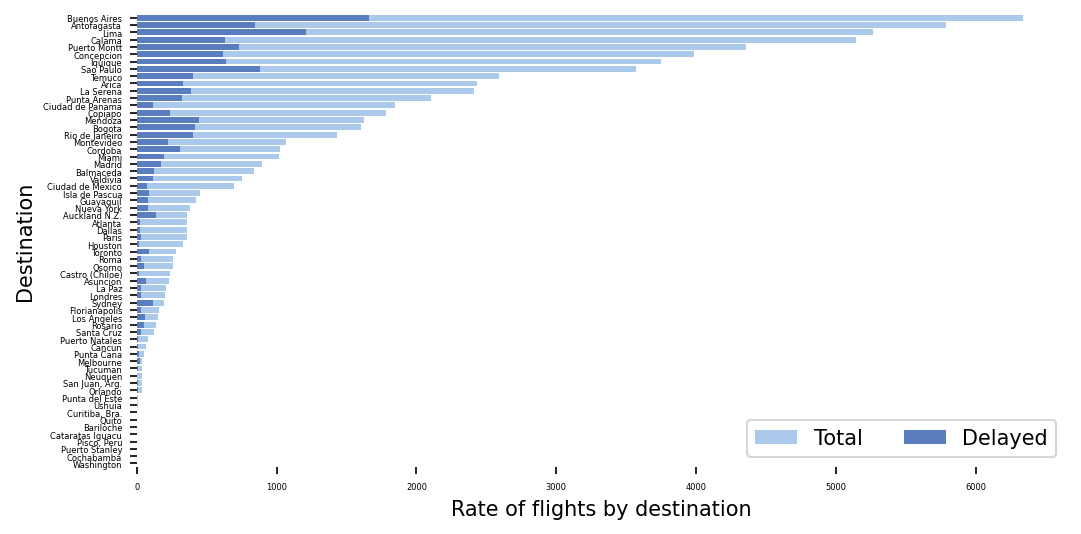

In [474]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi = 150)
sns.set_color_codes("pastel")
sns.barplot(ax=ax, x="total_flights", y="SIGLADES", data=grouped_by_destination, label="Total", color='b')
sns.set_color_codes("muted")
sns.barplot(ax=ax, x='atraso_15', y="SIGLADES", data=grouped_by_destination, label="Delayed", color='b')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Destination", xlabel="Rate of flights by destination")
ax.tick_params(labelsize=4)
sns.despine(left=True, bottom=True)
plt.savefig('delayed_flights/rate_by_destination.png')

In [466]:
grouped_by_destinaton = grouped_by_destination.sort_values("delayed_rate", ascending=False)
grouped_by_destination_filtered = grouped_by_destination.query("delayed_rate>=20.0").reset_index(drop=True)
grouped_by_destination_filtered = grouped_by_destination_filtered.sort_values("delayed_rate", ascending=False).reset_index(drop=True)
grouped_by_destination_filtered

,SIGLADES,total_flights,atraso_15,delayed_rate
0,Cochabamba,1,1,100.000000
1,Puerto Stanley,1,1,100.000000
2,Quito,2,2,100.000000
3,Ushuia,6,4,66.666667
4,Sydney,194,113,58.247423
5,Melbourne,39,21,53.846154
6,Bariloche,2,1,50.000000
7,Rosario,136,54,39.705882
8,Auckland N.Z.,361,137,37.950139
9,Los Angeles,154,56,36.363636


From the charts we can see that most of the delayed flights are associated to international flights, which is possible because the air traffic for flights between countries depend of several things like organization of the destination airport, wheather, communication between control towers and planes, and more. Also we can see that most of the delayed flights occurs in high season (November, December, July), which is consistent because the probability of having delayed flights increases as the amount of flights increase due the air traffic. 

Another conclussion associated to the text above, is that most of the delayed flights are operated by non-Chilean airlines, so it is possible that for foreing airlines increases the difficult of operate or schedule their flights. Also, the destination is a good point to have in mind because for common destinations is less probable to have a delay of the flight, compared with the non-common destinations. 

If we consider the days of the week, the number of delayed flights is higher on Mondays and Fridays, while is smaller on Saturdays, which is consistent because on Mondays and Fridays there are more flights, so the probability of having a delayed flight increases. 